<br>
<img src="data/uber_logo.png" alt="Logo de Uber" style="width:300px"/><br>

# **Uber NYC Analysis & Clustering**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

---
## **Análisis y visualización de datos temporales**

In [1]:
# Importación de librerías
import pandas as pd
from datetime import date
import holidays

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Lectura del dataset
df_uber = pd.read_csv('./data/uber_data_transformed.csv')
df_uber = df_uber.drop('Unnamed: 0', axis='columns') # Eliminación de columnas irrelevantes

# Conversión de fecha a tipo datetime
df_uber['date'] = pd.to_datetime(df_uber['date'])

# Creación de columna para facilitar las agrupaciones
df_uber['n_picks'] = 1

df_uber.head()

,date_time,date,n_month,month,n_week,n_day_week,day_week,weekend,day,hour,minute,lat,lon,base,nbhood,borough,n_picks
0,2014-04-01 00:11:00,2014-04-01,4,abr,14,2,mar,no,1,0,11,40.7690,-73.9549,B02512,Lenox Hill-Roosevelt Island,Manhattan,1
1,2014-04-01 00:17:00,2014-04-01,4,abr,14,2,mar,no,1,0,17,40.7267,-74.0345,B02512,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan,1
2,2014-04-01 00:21:00,2014-04-01,4,abr,14,2,mar,no,1,0,21,40.7316,-73.9873,B02512,East Village,Manhattan,1
3,2014-04-01 00:28:00,2014-04-01,4,abr,14,2,mar,no,1,0,28,40.7588,-73.9776,B02512,Midtown-Midtown South,Manhattan,1
4,2014-04-01 00:33:00,2014-04-01,4,abr,14,2,mar,no,1,0,33,40.7594,-73.9722,B02512,Turtle Bay-East Midtown,Manhattan,1


In [3]:
# Funciones para configurar el formato de las etiquetas de los ejes 

# Formato con separador de miles
def format_labels_sep(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

# Formato de miles (K)
def format_labels_k(x, pos):
    if x >= 1e3: return '{:,.0f}K'.format(x * 1e-3).replace(',', '.')
    elif x == 0: return '0K'
    else: return '{:,.1f}K'.format(x * 1e-3).replace(',', '.')

---
### **1 - Análisis de viajes por mes**

#### 1.1 - Evolución mensual del total y la media diaria de viajes

In [4]:
# Total de viajes al día
uber_month_date = df_uber.groupby(['n_month','month','date']).agg({'n_picks':'sum'}).reset_index()

# Total y media diaria de viajes por mes
uber_month = uber_month_date.groupby(['n_month','month']).agg(total_picks=('n_picks','sum'), mean_picks=('n_picks','mean')).round(2)
uber_month = uber_month.sort_values(by='n_month', ascending=True).reset_index()

uber_month

,n_month,month,total_picks,mean_picks
0,4,abr,564516,18817.20
1,5,may,652435,21046.29
2,6,jun,663844,22128.13
3,7,jul,796121,25681.32
4,8,ago,829275,26750.81
5,9,sep,1028136,34271.20


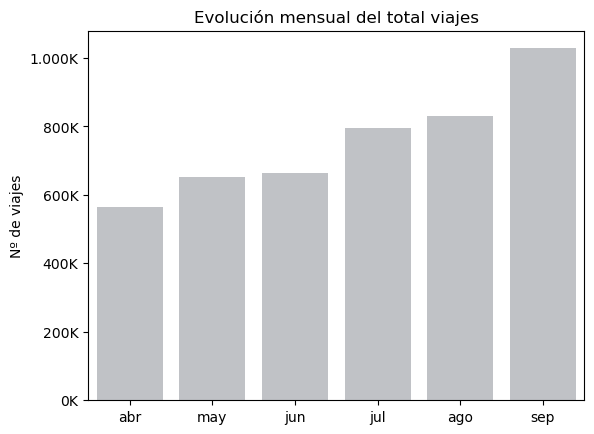

In [5]:
# Gráficos de barras con el total de viajes por mes
sns.barplot(x='month', y='total_picks', data=uber_month, color='#BFC2C7')

# Título y etiquetas de los ejes
plt.title('Evolución mensual del total viajes')
plt.xlabel(None)
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

plt.show()

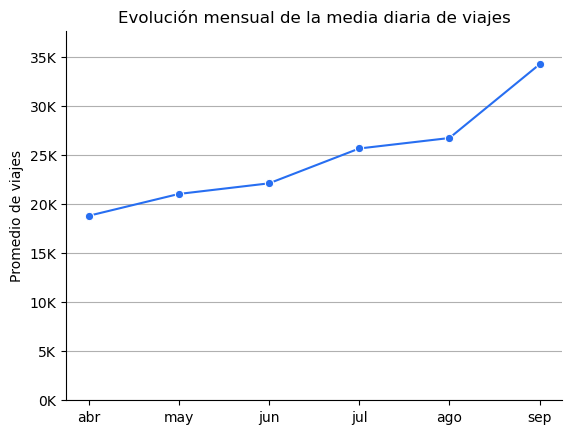

In [6]:
# Gráfico de líneas con la media diaria de viajes por mes
sns.lineplot(x='month', y='mean_picks', data=uber_month, marker='o', color='#276EF1')

# Título y ejes de las etiquetas
plt.title('Evolución mensual de la media diaria de viajes')
plt.xlabel(None)
plt.ylabel('Promedio de viajes')
# Formato del eje y
plt.ylim(0, max(uber_month['mean_picks']*1.1))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Rejilla horizontal
plt.grid(axis='y')

sns.despine() # Eliminación de bordes

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
El primer insight que se extrae de los datos es que, desde abril a septiembre de en 2014, Uber se encontraba en un proceso de crecimiento en Nueva York, registrando un aumento de casi el doble en el total de viajes. Este incremento sostenido refleja la creciente demanda y la popularidad en ascenso de los servicios de la compañía en la ciudad.
<br><br>
El mes de septiembre emerge con un marcado incremento en los viajes (superando el millón de viajes y aumentado un 24% el ratio de recogidas en comparación con el mes anterior), debido, entre otras cosas, al regreso a la rutina después de las vacaciones de verano.
</div>

#### 1.2 - Mapa de calor del total de viajes por mes y día mensual

In [7]:
# Total de viajes por mes y por día mensual
uber_month_day = df_uber.groupby(['n_month','month','day'])['n_picks'].count().unstack()

# Eliminación del índice 'n_month' después de ordenar los meses cronológicamente
uber_month_day.index = uber_month_day.index.droplevel('n_month')

uber_month_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
abr,14546.0,17474.0,20701.0,26714.0,19521.0,13445.0,19550.0,16188.0,16843.0,20041.0,...,16975.0,20346.0,23352.0,25095.0,24925.0,14677.0,15475.0,22835.0,36251.0,NaN
may,23375.0,24235.0,22234.0,13918.0,17859.0,19300.0,21891.0,27513.0,26385.0,22550.0,...,26802.0,26465.0,14651.0,10841.0,10202.0,17004.0,22240.0,24930.0,24413.0,21261.0
jun,15967.0,17503.0,22674.0,22831.0,28371.0,24683.0,20889.0,15749.0,23244.0,22874.0,...,16322.0,17735.0,20779.0,26460.0,28516.0,24895.0,21208.0,17107.0,18395.0,NaN
jul,21228.0,26480.0,21597.0,14148.0,10890.0,11443.0,18280.0,25763.0,27817.0,30541.0,...,29029.0,34073.0,32050.0,29975.0,27708.0,22590.0,23981.0,27589.0,30740.0,33541.0
ago,32353.0,28678.0,23146.0,24952.0,28094.0,30495.0,32759.0,30411.0,26286.0,20584.0,...,29512.0,27097.0,22036.0,22093.0,24550.0,27018.0,28597.0,27424.0,23930.0,23271.0
sep,19961.0,28831.0,32631.0,38360.0,42319.0,40520.0,30134.0,30360.0,34560.0,35910.0,...,28312.0,30316.0,31301.0,38203.0,37504.0,39468.0,29656.0,29201.0,33431.0,NaN


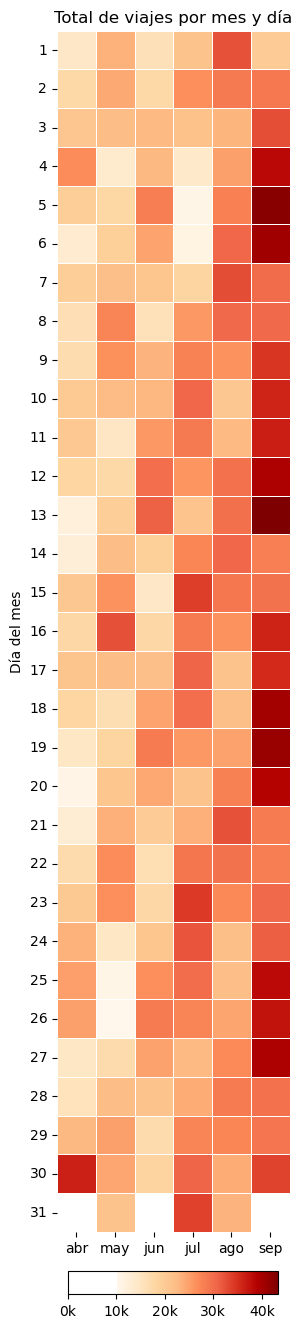

In [8]:
plt.figure(figsize=(3, 15.6)) # Ajuste del tamaño del gráfico

# Mapa de calor con el total de viajes por mes y por día mensual
heatmap = sns.heatmap(uber_month_day.T, cmap='OrRd', linecolor='white', linewidths=0.5, cbar=False)

# Título y etiquetas de los ejes
plt.title('Total de viajes por mes y día')
plt.xlabel(None)
plt.ylabel('Día del mes')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.axis('equal')

# Leyenda
cax = heatmap.figure.add_axes([0.16, 0.07, 0.7, 0.015])
cb = plt.colorbar(heatmap.collections[0], cax=cax, orientation='horizontal')

cb_ticks = [0, 10000, 20000, 30000, 40000]
cb.set_ticks(cb_ticks)
cb.set_ticklabels([f'{tick/1000:.0f}k' for tick in cb_ticks])

plt.show()

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
El mes de septiembre también destaca como el mes con el mayor número de picos en la demanda de viajes. Por otro lado, los días que presentan una menor cantidad de viajes corresponden a finales de mayo (25 y 26) y a principios de julio (5 y 6).
<br><br>
Además, es interesante notar que el primer día con una demanda muy alta se registra el 30 de abril, lo que sugiere una posible modificación en la estrategia de captación o una posible campaña de promoción durante ese día.
</div>

---
### **2 - Análisis de viajes por día de la semana**

#### 2.1 - Evolución del total y la media diaria de viajes por día de la semana

In [9]:
# Total de viajes al día
uber_week_date = df_uber.groupby(['n_day_week','day_week','date']).agg({'n_picks':'sum'}).reset_index()

# Total y media diaria de viajes por semana
uber_week = uber_week_date.groupby(['n_day_week','day_week']).agg(total_picks=('n_picks','sum'), mean_picks=('n_picks','mean')).round(2)
uber_week = uber_week.sort_values(by='n_day_week', ascending=True).reset_index()

uber_week

,n_day_week,day_week,total_picks,mean_picks
0,1,lun,541472,20825.85
1,2,mar,663789,24584.78
2,3,mie,696488,26788.00
3,4,jue,755145,29044.04
4,5,vie,741139,28505.35
5,6,sab,646114,24850.54
6,7,dom,490180,18853.08


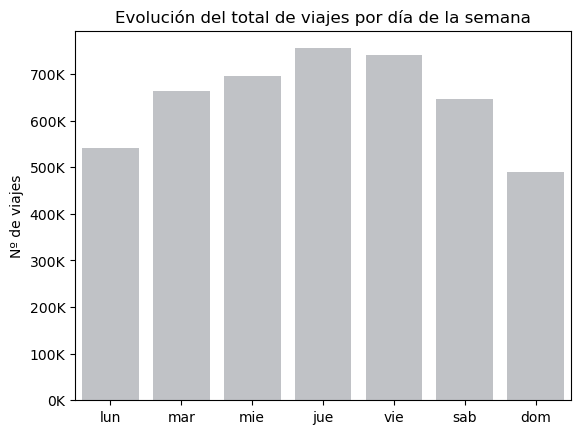

In [10]:
# Gráficos de barras con el total de viajes por día de la semana
sns.barplot(x='day_week', y='total_picks', data=uber_week, color='#BFC2C7')

# Título y etiquetas de los ejes
plt.title('Evolución del total de viajes por día de la semana')
plt.xlabel(None)
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

plt.show()

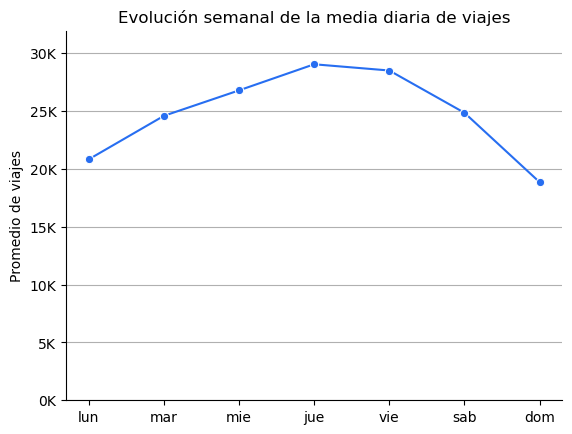

In [11]:
# Gráfico de líneas con la media diaria de viajes por día de la semana
sns.lineplot(x='day_week', y='mean_picks', data=uber_week, marker='o', color='#276EF1')

# Título y ejes de las etiquetas
plt.title('Evolución semanal de la media diaria de viajes')
plt.xlabel(None)
plt.ylabel('Promedio de viajes')
# Formato del eje y
plt.ylim(0, max(uber_week['mean_picks']*1.1))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Rejilla horizontal
plt.grid(axis='y')

sns.despine() # Eliminación de bordes

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Los días laborables, especialmente de miércoles a viernes, registran una actividad de viajes significativamente mayor en comparación con los fines de semana. Particularmente, los jueves son el día de la semana con el mayor promedio de viajes al día, superando los 29.000 viajes de media. En contraste, los fines de semana experimentan una disminución de viajes, situándose el domingo como el día con el menor número de viajes.
<br><br>
Este patrón semanal de uso de Uber muestra una mayor necesidad de transporte durante los días laborables, debido a las actividades laborales y el desplazamiento de la población en la ciudad. A diferencia de esto, los fines de semana se caracterizan por una menor necesidad de viajar, ya que las personas realizan sus actividades cerca de sus hogares.
</div>

#### 2.2 - Comparativa mensual del total de viajes por día de la semana

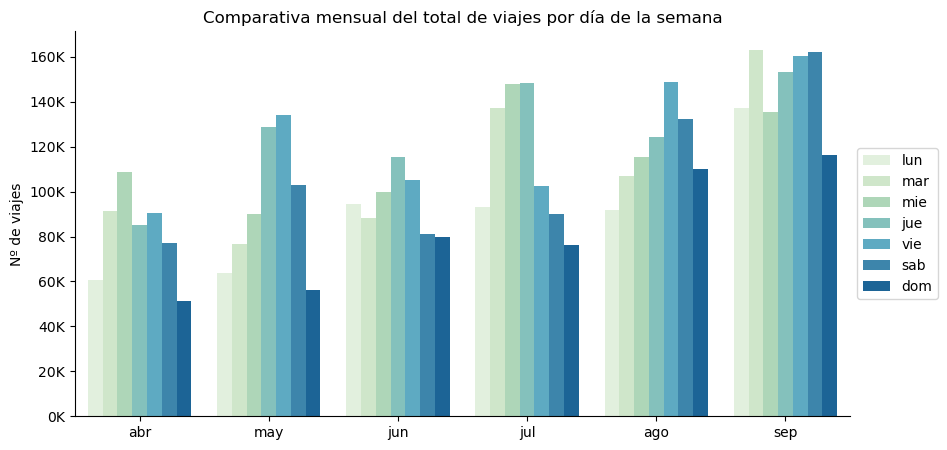

In [12]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de barras con el total de viajes por mes y por día de la semana
sns.countplot(x='month', data=df_uber, hue='day_week', hue_order=['lun','mar','mie','jue','vie','sab','dom'], palette='GnBu')

# Título y etiquetas de los ejes
plt.title('Comparativa mensual del total de viajes por día de la semana')
plt.xlabel(None)
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Leyenda
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine() # Eliminación de bordes

#### 2.3 - Mapa de calor de la media diaria de viajes por día de la semana y hora

In [13]:
# Total de viajes al día
uber_week_hour_date = df_uber.groupby(['n_day_week','day_week','date','hour']).agg({'n_picks':'sum'}).reset_index()

# Media diaria de viajes por día de la semana y por hora
uber_week_hour = uber_week_hour_date.groupby(['n_day_week','day_week','hour'])['n_picks'].mean().round(0).unstack()

# Eliminación del índice 'n_month' después de ordenar los meses cronológicamente
uber_week_hour.index = uber_week_hour.index.droplevel('n_day_week')

uber_week_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_week,,,,,,,,,,,,,,,,,,,,,
lun,248.0,144.0,113.0,240.0,371.0,578.0,913.0,1198.0,1126.0,854.0,...,1083.0,1259.0,1491.0,1616.0,1423.0,1314.0,1263.0,1112.0,775.0,454.0
mar,231.0,130.0,95.0,166.0,280.0,527.0,995.0,1356.0,1257.0,927.0,...,1291.0,1531.0,1802.0,2056.0,1859.0,1659.0,1654.0,1478.0,1026.0,572.0
mie,294.0,166.0,121.0,187.0,289.0,531.0,1036.0,1404.0,1301.0,986.0,...,1352.0,1669.0,1949.0,2140.0,2028.0,1808.0,1837.0,1714.0,1264.0,698.0
jue,357.0,203.0,143.0,217.0,327.0,545.0,1041.0,1425.0,1363.0,1070.0,...,1412.0,1709.0,1945.0,2181.0,2147.0,1996.0,2000.0,1998.0,1700.0,1068.0
vie,528.0,314.0,206.0,267.0,339.0,517.0,900.0,1233.0,1212.0,970.0,...,1393.0,1680.0,1853.0,1998.0,2106.0,1908.0,1675.0,1859.0,1900.0,1587.0
sab,1063.0,738.0,489.0,367.0,263.0,272.0,330.0,424.0,554.0,680.0,...,1208.0,1491.0,1674.0,1648.0,1765.0,1581.0,1489.0,1686.0,1844.0,1661.0
dom,1264.0,885.0,594.0,408.0,245.0,237.0,254.0,336.0,466.0,631.0,...,1083.0,1197.0,1271.0,1212.0,1088.0,998.0,964.0,922.0,753.0,468.0


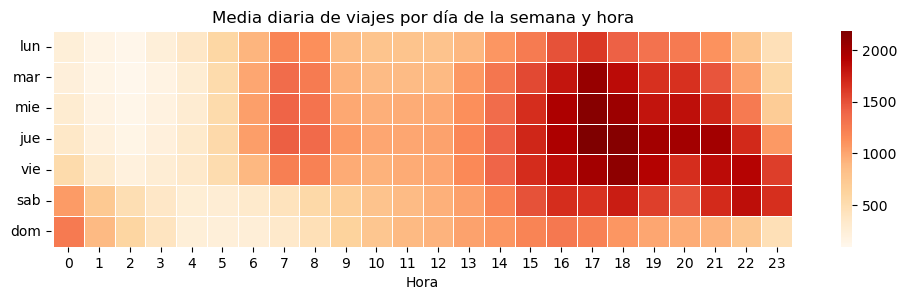

In [14]:
plt.figure(figsize=(12, 2.8)) # Ajuste del tamaño del gráfico

# Mapa de calor con la media diaria de viajes por día de la semana y por hora
sns.heatmap(uber_week_hour, cmap='OrRd', linecolor='white', linewidths=0.5)

# Título y etiquetas de los ejes
plt.title('Media diaria de viajes por día de la semana y hora')
plt.xlabel('Hora')
plt.ylabel(None)
plt.yticks(rotation=0)

plt.axis('equal')

plt.show()

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Profundizando en la actividad de Uber a lo largo de la semana y el día, se pueden descubrir tendencias que pueden ser muy útiles para la planificación de recursos y la gestión de flotas de vehículos, ya que permiten asignar recursos de manera más eficiente durante las horas pico y ajustarse en momentos de menor demanda.
<br><br>    
Los momentos del día con una demanda más alta se concentran en los días laborables. Durante estos días, se observan dos momentos de demanda particularmente notables: uno más reducido durante las 7 y las 8 de la mañana, por el inicio de la jornada laboral, y otro más prolongado que abarca desde las 15:00 hasta las 21:00. Este último coincide tanto con el final de la jornada laboral como con las horas habituales de actividades recreativas durante la semana laboral.
<br><br>    
Examinando el fin de semana, se aprecia como la población tiende a salir por la noche tanto los viernes como los sábados, y la cantidad de viajes sigue siendo notablemente alta en la primera hora de los dos días siguientes. Sin embargo, la actividad de viajes disminuye significativamente durante el domingo en comparación con el resto de la semana.
</div>

---
### **3 - Análisis de viajes por las horas del día**

#### 3.1 - Evolución horaria del total y la media diaria de viajes

In [15]:
# Total de viajes al día por hora
uber_date_hour = df_uber.groupby(['date','hour']).agg({'n_picks':'sum'}).reset_index()

# Total y media diaria de viajes por hora
uber_hour = uber_date_hour.groupby('hour').agg(total_picks=('n_picks','sum'), mean_picks=('n_picks','mean')).round(2)
uber_hour = uber_hour.sort_values(by='hour', ascending=True).reset_index()

uber_hour

,hour,total_picks,mean_picks
0,0,103836,567.41
1,1,67227,367.36
2,2,45865,250.63
3,3,48287,263.86
4,4,55230,301.80
5,5,83939,458.68
6,6,143213,782.58
7,7,193094,1055.16
8,8,190504,1041.01
9,9,159967,874.14


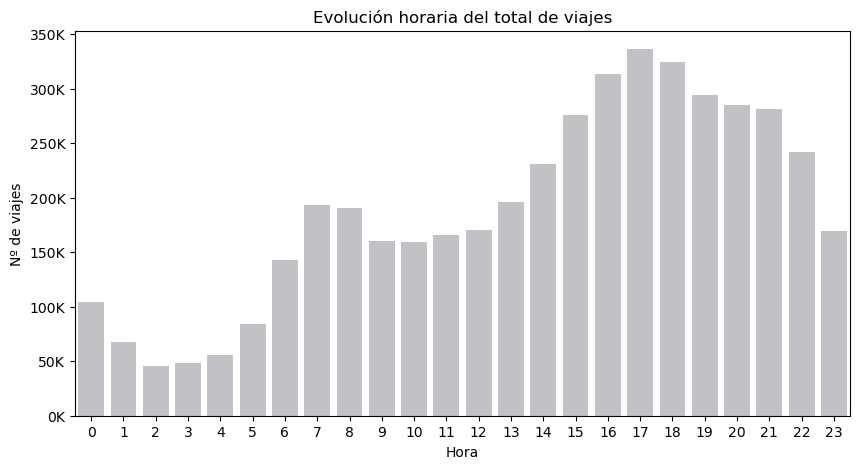

In [16]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de barras con el total de viajes por hora
sns.barplot(x='hour', y='total_picks', data=uber_hour, color='#BFC2C7')

# Título y etiquetas de los ejes
plt.title('Evolución horaria del total de viajes')
plt.xlabel('Hora')
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

plt.show()

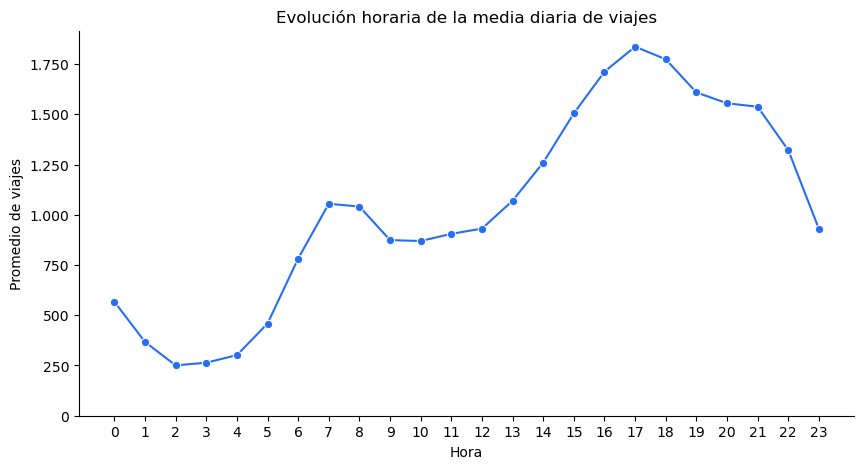

In [17]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de líneas con la media diaria de viajes por hora
sns.lineplot(x='hour', y='mean_picks', data=uber_hour, marker='o', color='#276EF1')

# Título y ejes de las etiquetas
plt.title('Evolución horaria de la media diaria de viajes')
plt.xlabel('Hora')
plt.ylabel('Promedio de viajes')
# Formato de los ejes x e y
plt.xticks(range(24))
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_sep))

sns.despine() # Eliminación de bordes

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Los datos de los viajes al día por hora revelan patrones significativos a lo largo de las 24 horas del día. Se observa un aumento en la demanda durante las primeras horas de la mañana, concretamente entre las 7:00 y las 9:00, cuando se registran casi 2.000 viajes diarios de media. La tarde, entre las 16:00 y las 19:00, muestra una demanda constante, alcanzando su punto máximo a las 17:00, con más de 1.800 viajes. Sin embargo, la demanda disminuye durante las horas nocturnas, llegando a su punto más bajo a las 2:00.
<br><br>    
Esto indica que la gran mayoría de usuarios recurren a Uber para sus desplazamientos laborales, ya que los dos picos del día coinciden con la entrada y la salida de la jornada en Estados Unidos.
</div>

#### 3.2 - Mapa de calor del total de viajes por mes y hora

In [18]:
# Total de viajes por mes y por hora
uber_month_hour_t = df_uber.groupby(['n_month','month','hour'])['n_picks'].sum().unstack()

# Eliminación del índice 'n_month' después de ordenar los meses cronológicamente
uber_month_hour_t.index = uber_month_hour_t.index.droplevel('n_month')

uber_month_hour_t

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
abr,11910,7769,4935,5040,6095,9476,18498,24924,22843,17939,...,27190,35324,42003,45475,43003,38923,36244,36964,30645,20649
may,13875,8186,5372,5946,6945,10789,21015,27413,25460,20507,...,34363,43087,49127,51508,48965,42387,40731,42217,35556,24836
jun,14514,9167,6189,6937,7701,11955,22030,30834,29771,24298,...,34428,41586,48162,50452,45013,38203,40108,40791,35614,24182
jul,17953,11527,8562,9199,10040,14932,23456,32545,33387,28486,...,41357,46053,52403,58260,57268,52332,51859,49528,42218,29346
ago,21451,14471,10105,10376,11774,16525,24907,34064,34566,30195,...,40644,48197,53481,57122,55390,53008,51674,51354,46008,33609
sep,24133,16107,10702,10789,12675,20262,33307,43314,44477,38542,...,52643,61219,68224,73373,75040,69660,63988,60606,51817,36568


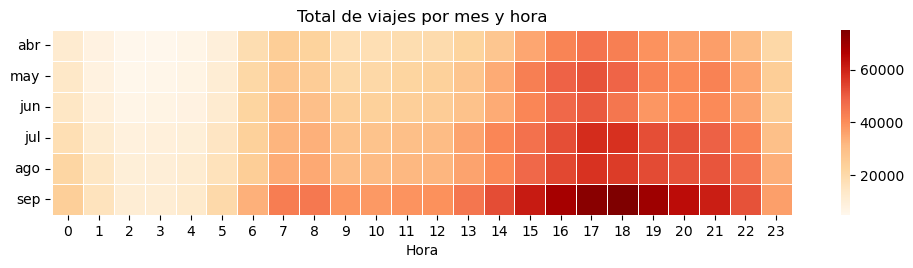

In [19]:
plt.figure(figsize=(12, 2.4)) # Ajuste del tamaño del gráfico

# Mapa de calor con el total de viajes por mes y por hora
sns.heatmap(uber_month_hour_t, cmap='OrRd', linecolor='white', linewidths=0.5)

# Título y etiquetas de los ejes
plt.title('Total de viajes por mes y hora')
plt.xlabel('Hora')
plt.ylabel(None)
plt.yticks(rotation=0)

plt.axis('equal')

plt.show()

#### 3.3 - Comparativa de la media diaria de viajes por hora en los diferentes meses

In [20]:
# Total de viajes al día
uber_month_hour_date = df_uber.groupby(['n_month','month','date','hour']).agg({'n_picks':'sum'}).reset_index()

# Total y media diaria de viajes por mes y por hora
uber_month_hour_m = uber_month_hour_date.groupby(['n_month','month','hour']).agg(total_picks=('n_picks','sum'), mean_picks=('n_picks','mean')).round(2)
uber_month_hour_m = uber_month_hour_m.sort_values(by=['hour','n_month'], ascending=[True,True]).reset_index()

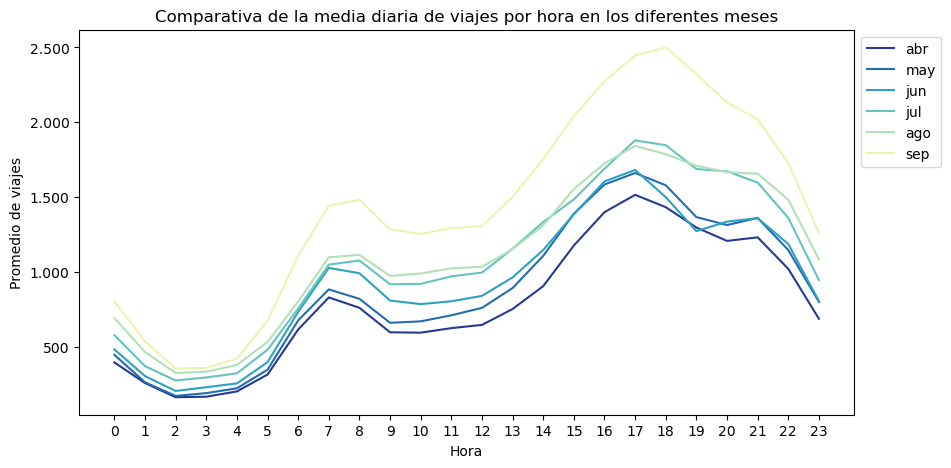

In [21]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráfico de líneas con la media diaria de viajes por mes
sns.lineplot(x='hour', y='mean_picks', hue='month', data=uber_month_hour_m, palette='YlGnBu_r')

# Título y etiquetas de los ejes
plt.title('Comparativa de la media diaria de viajes por hora en los diferentes meses')
plt.xlabel('Hora')
plt.ylabel('Promedio de viajes')
plt.xticks(range(24))
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_sep))

# Leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Analizando los viajes por hora en los diferentes meses, se detecta que el comportamiento general del número de viajes por hora es constante a lo largo del año. La diferencia que es notoria reside en el aumento en el volumen de trayectos registrados.
</div>

#### 3.4 - Comparativa de la media diaria de viajes por hora en días de la semana vs. en fin de semana

In [22]:
# Total de viajes al día
uber_weekend_hour_date = df_uber.groupby(['weekend','n_day_week','day_week','hour','date']).agg({'n_picks':'sum'}).reset_index()

# Media diaria de viajes por día de la semana y por hora
uber_weekend_hour = uber_weekend_hour_date.groupby(['weekend','n_day_week','day_week','hour']).agg(total_picks=('n_picks','sum'), mean_picks=('n_picks','mean')).round(2)
uber_weekend_hour = uber_weekend_hour.sort_values(by=['hour','n_day_week'], ascending=[True,True]).reset_index()

In [23]:
# Dataframes para los días de la semana y de fin de semana
uber_no_weekend_hour = uber_weekend_hour[uber_weekend_hour['weekend'] == 'no']
uber_weekend_hour = uber_weekend_hour[uber_weekend_hour['weekend'] == 'yes']

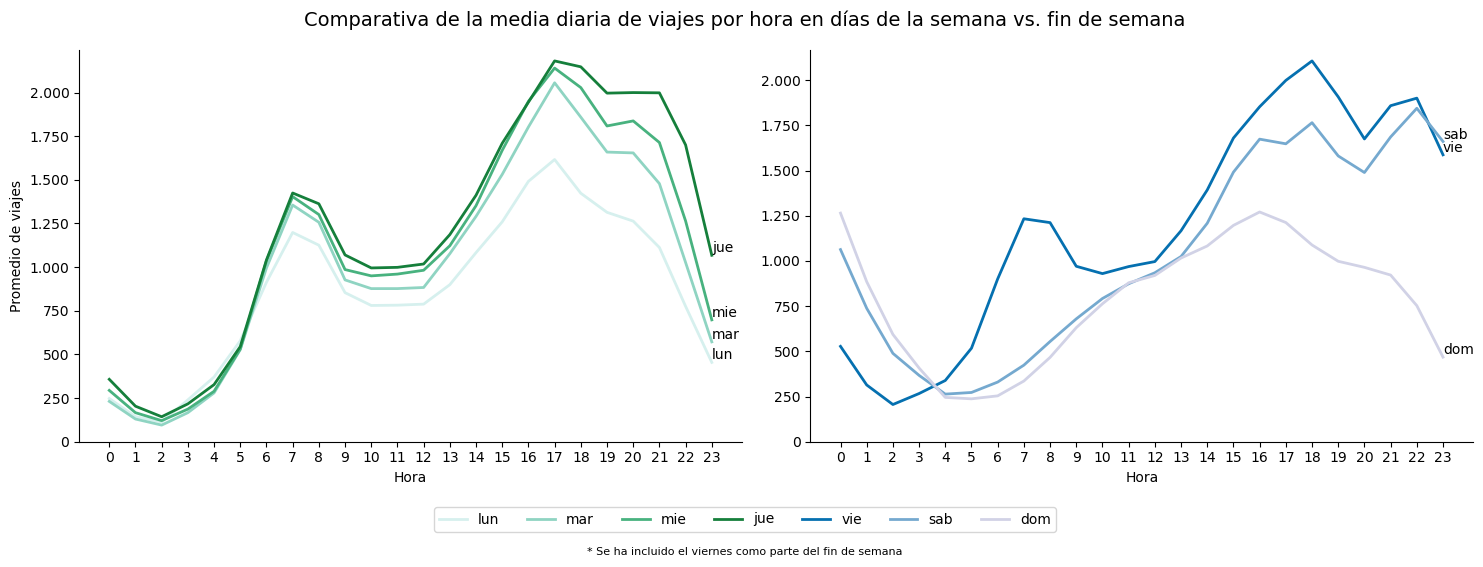

In [24]:
plt.figure(figsize=(15, 5)) # Ajuste del tamaño del gráfico

# Título del subplot
plt.suptitle('Comparativa de la media diaria de viajes por hora en días de la semana vs. fin de semana', fontsize=14)

# Subplot para los días de la semana
plt.subplot(1, 2, 1)

# Gráfico de líneas con la media diaria de viajes por días de la semana y por hora
sns.lineplot(x='hour', y='mean_picks', hue='day_week', data=uber_no_weekend_hour, linewidth=2, palette='BuGn')

# Título y etiqueta de los ejes
plt.xlabel('Hora'), plt.ylabel('Promedio de viajes')
plt.xticks(range(24)), plt.ylim(0, max(uber_no_weekend_hour['mean_picks']*1.03))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_sep))
# Leyenda
plt.legend().remove()
handles1, labels1 = plt.gca().get_legend_handles_labels()

# Bucle para agregar el día de la semana al final de cada línea
for line, name in zip(plt.gca().get_lines(), uber_no_weekend_hour['day_week'].unique()):
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    plt.text(x, y, name, ha='left', va='bottom', fontsize=10)

# Subplot para los días del fin de semana
plt.subplot(1, 2, 2)

# Gráfico de líneas con la media diaria de viajes por día del fin de semana y por hora
sns.lineplot(x='hour', y='mean_picks', hue='day_week', data=uber_weekend_hour, linewidth=2, palette='PuBu_r')

# Título y etiqueta de los ejes
plt.xlabel('Hora'), plt.ylabel(None)
plt.xticks(range(24)), plt.ylim(0, max(uber_weekend_hour['mean_picks']*1.03))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_sep))
# Leyenda
plt.legend().remove()
handles2, labels2 = plt.gca().get_legend_handles_labels()

# Bucle para agregar el día de la semana al final de cada línea
for line, name in zip(plt.gca().get_lines(), uber_weekend_hour['day_week'].unique()):
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    plt.text(x, y, name, ha='left', va='bottom', fontsize=10)

handles = handles1 + handles2
labels = labels1 + labels2

# Leyenda única
legend = plt.figlegend(handles, labels, ncol=len(labels), loc='upper center', bbox_to_anchor=(0.5, 0))
# Ancho de las líneas
for line in legend.get_lines():
    line.set_linewidth(2)
     
plt.tight_layout() # Ajuste del espaciado entre subplots

plt.text(s="* Se ha incluido el viernes como parte del fin de semana", x=0.5, y=-0.11, horizontalalignment='center', fontsize=8, transform=plt.gcf().transFigure)

sns.despine() # Eliminación de bordes

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Al comparar la evolución horaria a lo largo de la semana, se observa un patrón muy similar de lunes a viernes. Sin embargo, el viernes presenta un aumento significativo en la demanda de viajes a las 20:00 y 21:00, en consecuencia de que es el comienzo del fin de semana y la población tiende a buscar actividades de ocio en esa franja horaria.
<br><br>
El sábado sigue un patrón muy parecido al viernes, pero con un descenso en la demanda por la mañana dado que no es un día laboral. En contraste, el domingo se posiciona como el día de la semana con más viajes en la madrugada al alargarse la noche del sábado, pero posteriormente experimenta una reducción notable en la actividad durante el resto del día.
</div>

#### 3.5 - Mapa de calor del total de viajes por día del mes y hora

In [25]:
# Total de viajes por día del mes y por hora
uber_day_hour = df_uber.groupby(['day','hour'])['n_picks'].sum().unstack()

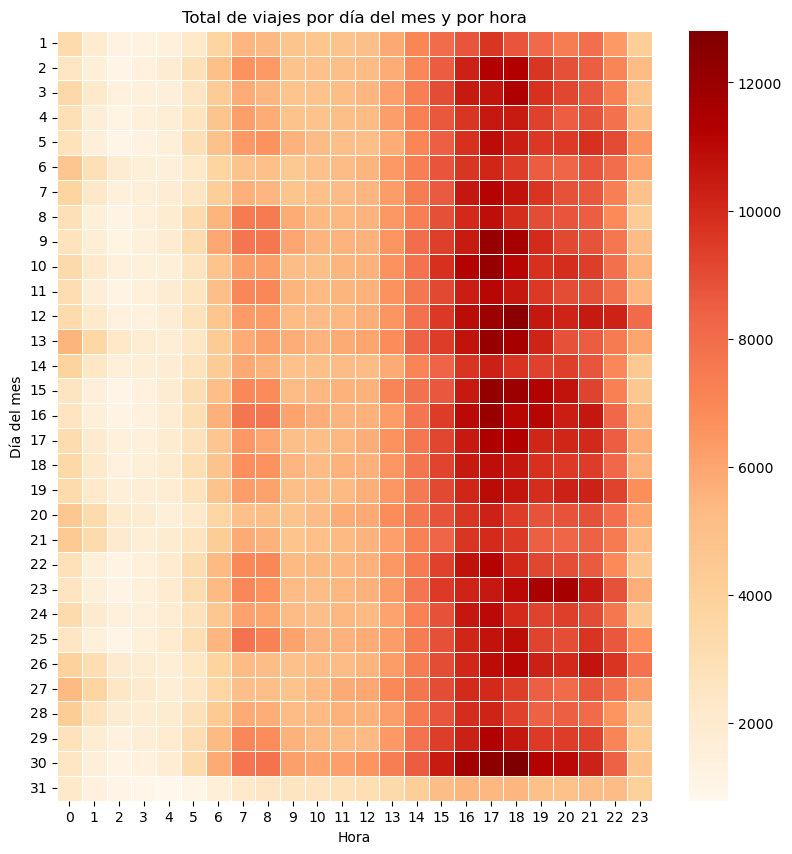

In [26]:
plt.figure(figsize=(9.6, 10)) # Ajuste del tamaño del gráfico

# Mapa de calor con el total de viajes por día del mes y por hora
sns.heatmap(uber_day_hour, cmap='OrRd', linecolor='white', linewidths=0.5)

# Título y etiquetas de los ejes
plt.title('Total de viajes por día del mes y por hora')
plt.xlabel('Hora')
plt.ylabel('Día del mes')
plt.yticks(rotation=0)

plt.axis('equal')

plt.show()

#### 3.6 - Mapa de calor de la media diaria de viajes por hora y minuto

In [27]:
# Total de viajes al día
uber_hour_minute_date = df_uber.groupby(['date','hour','minute']).agg({'n_picks':'sum'}).reset_index()

# Media diaria de viajes por hora y por minuto
uber_hour_minute = uber_hour_minute_date.groupby(['hour','minute'])['n_picks'].mean().round(2).unstack()

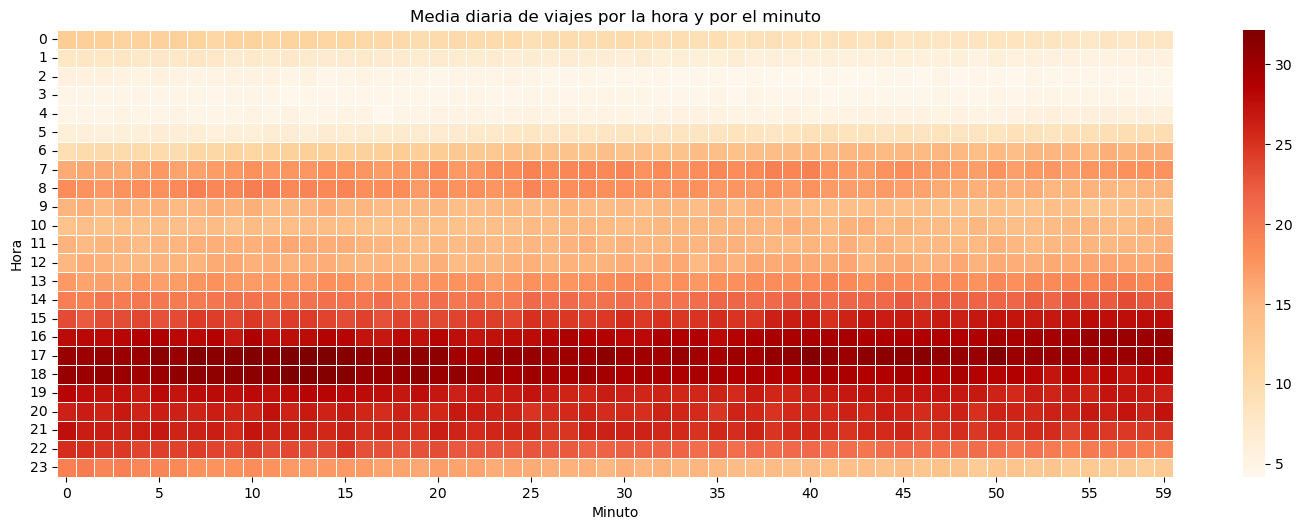

In [28]:
plt.figure(figsize=(18, 5.8)) # Ajuste del tamaño del gráfico

# Mapa de calor con la media diaria de viajes por hora y por minuto
sns.heatmap(uber_hour_minute, cmap='OrRd', linecolor='white', linewidths=0.5)

# Título y etiquetas de los ejes
plt.title('Media diaria de viajes por la hora y por el minuto')
plt.xlabel('Minuto')
plt.ylabel('Hora')
plt.xticks([0.5, 5.5, 10.5, 15.5, 20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5, 55.5, 59.5], ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '59'])
plt.yticks(rotation=0)

plt.axis('equal')

plt.show()

---
### **4 - Análisis de viajes por fecha**

#### 4.1 - Distribución del total de viajes al día

In [29]:
# Total de viajes por fecha
uber_date = df_uber.groupby(['month','day_week','date']).agg(total_picks=('n_picks','sum')).reset_index()

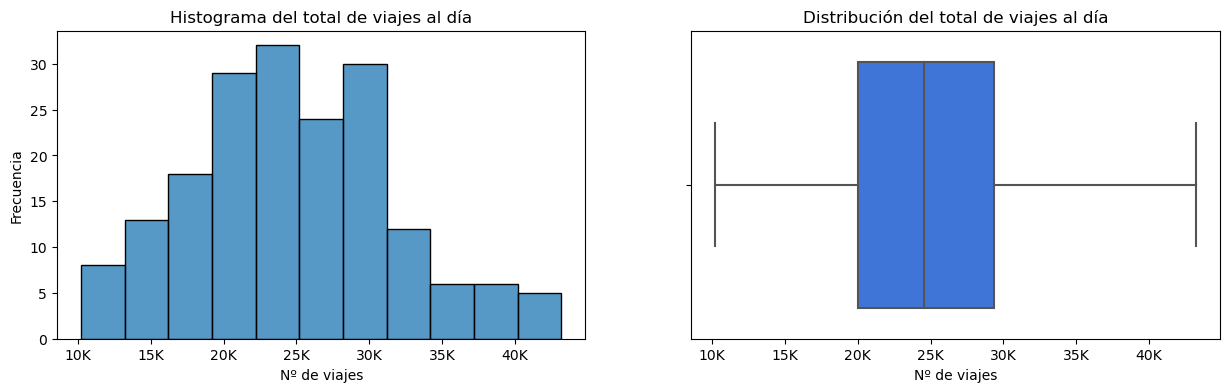

In [30]:
plt.figure(figsize=(15, 4)) # Ajuste del tamaño del subplot

# Subplot del histograma
plt.subplot(1, 2, 1)

# Histograma con la distribución del total de viajes al día
sns.histplot(uber_date['total_picks'], kde=False)
# Título y etiquetas de los ejes
plt.title('Histograma del total de viajes al día')
plt.xlabel('Nº de viajes')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Subplot del boxplot
plt.subplot(1, 2, 2)

# Boxplot con la distribución del total de viajes al día
sns.boxplot(x=uber_date['total_picks'], color='#276EF1')
# Título y etiquetas de los ejes
plt.title('Distribución del total de viajes al día')
plt.xlabel('Nº de viajes')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

plt.show()

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
La mayoría de los días registran un número de viajes que se sitúa entre 20.000 y 30.000. Este rango concentra la mayor parte de la actividad diaria de viajes.
</div>

#### 4.2 - Distribución del total de viajes al día por meses

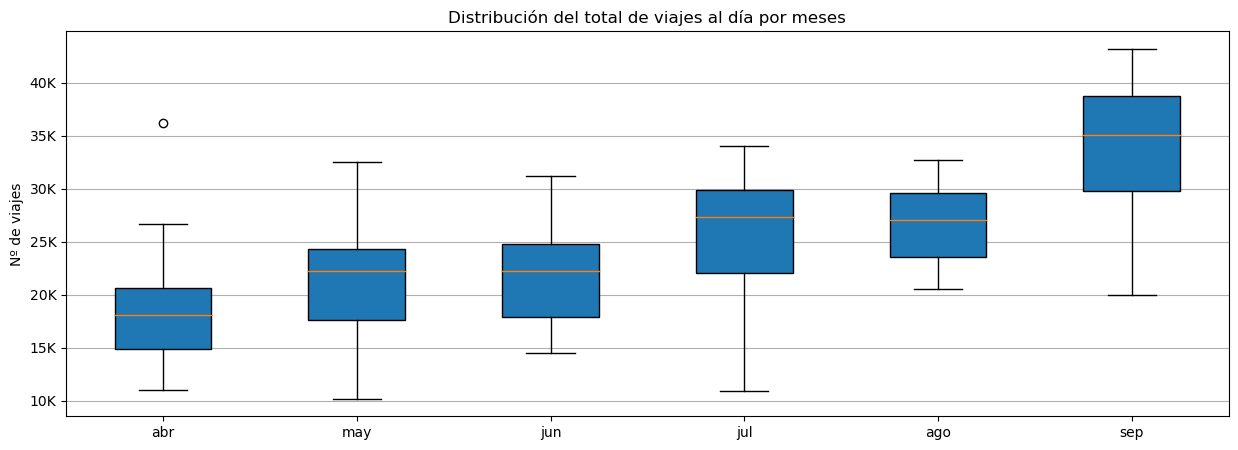

In [31]:
# Dataframes del total de viajes al día para cada mes
boxplot_month = [uber_date[uber_date['month'] == month]['total_picks'] for month in ['abr','may','jun','jul','ago','sep']]

plt.figure(figsize=(15, 5)) # Ajuste del tamaño del gráfico

# Boxplots con el total de viajes al día por meses
plt.boxplot(boxplot_month, labels=['abr','may','jun','jul','ago','sep'], patch_artist=True)

# Título y etiquetas de los ejes
plt.title('Distribución del total de viajes al día por meses')
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Rejilla horizontal
plt.grid(axis='y')

plt.show()

#### 4.3 - Distribución del total de viajes al día por cada día de la semana

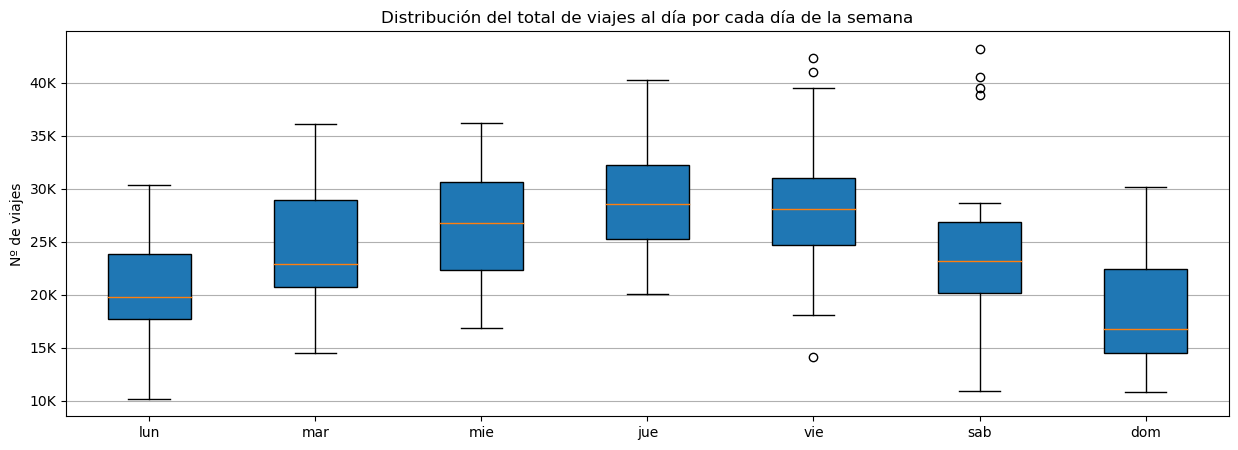

In [32]:
# Dataframes del total de viajes al día para cada día de la semana
uber_dayweek_date = [uber_date[uber_date['day_week'] == day_week]['total_picks'] for day_week in ['lun','mar','mie','jue','vie','sab','dom']]

plt.figure(figsize=(15, 5)) # Ajuste del tamaño del gráfico

# Boxplots con el total de viajes al día por días de la semana
plt.boxplot(uber_dayweek_date, labels=['lun','mar','mie','jue','vie','sab','dom'], patch_artist=True)

# Título y etiquetas de los ejes
plt.title('Distribución del total de viajes al día por cada día de la semana')
plt.ylabel('Nº de viajes')
# Formato del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Rejilla horizontal
plt.grid(axis='y')

plt.show()

In [33]:
# Dataframe para almacenar los outliers
outliers = pd.DataFrame(columns=['day_week','date','total_picks'])

# Bucle para obtener los outliers para cada día de la semana
for i in ['lun', 'mar', 'mie', 'jue', 'vie', 'sab', 'dom']:
    
    # Datos filtrados para cada día de la semana
    subset = uber_date[uber_date['day_week'] == i][['day_week', 'date', 'total_picks']]
    
    # 1er cuartil y 3er cuartil para definir el rango intercuartílico (IQR)
    Q1 = subset['total_picks'].quantile(0.25)
    Q3 = subset['total_picks'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Valor mínimo y máximo que delimita el rango típico de precios
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers para cada día de la semana
    outliers_week = subset[(subset['total_picks'] < lower_bound) | (subset['total_picks'] > upper_bound)]
    outliers = pd.concat([outliers, outliers_week])

outliers.reset_index(drop=True)

,day_week,date,total_picks
0,vie,2014-07-04,14148
1,vie,2014-09-05,42319
2,vie,2014-09-19,41017
3,sab,2014-09-06,40520
4,sab,2014-09-13,43205
5,sab,2014-09-20,38864
6,sab,2014-09-27,39468


<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
Tras analizar la distribución del total de viajes al día por cada día de la semana, se identifican varios outliers. Estos casos atípicos se encuentran únicamente durante los viernes y los sábados, donde 6 de los 7 outliers identificados son en el mes de septiembre y todos superan el número habitual de viajes.
</div>

#### 4.4 - Impacto de las vacaciones en los viajes

In [34]:
# Vacaciones de Nueva York en 2014
nyc_holidays = holidays.US(state='NY', years=2014)

# Fecha de inicio y fin para seleccionar sólo las vacaciones entre abril y septiembre
start_date = date(2014, 4, 1)
end_date = date(2014, 9, 30)

# Lista con los días festivos en Nueva York en el rango de fechas seleccionado
list_holidays = [(holiday_date, holiday_name) for holiday_date, holiday_name in nyc_holidays.items() if start_date <= holiday_date <= end_date]
list_holidays

[(datetime.date(2014, 5, 26), 'Memorial Day'),
 (datetime.date(2014, 7, 4), 'Independence Day'),
 (datetime.date(2014, 9, 1), 'Labor Day')]

In [35]:
# Condiciones para filtrar una semana antes y una después del primer y último día de vacaciones
cond_start = df_uber['date'] >= '2014-05-19'
cond_date = df_uber['date'] <= '2014-09-08'

# Total de viajes por fecha filtrando por las fechas definidas
uber_holidays = df_uber[cond_start & cond_date]
uber_holidays = uber_holidays.groupby('date').agg({'n_picks':'sum'}).rename(columns={'n_picks':'total_picks'}).reset_index()

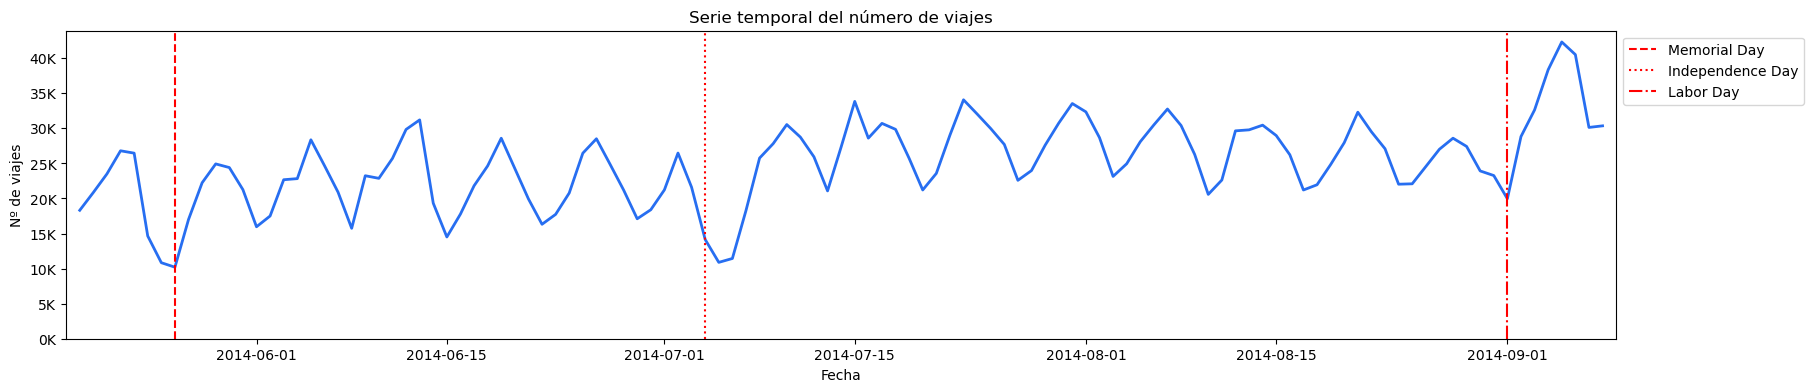

In [36]:
plt.figure(figsize=(20, 4)) # Ajuste del tamaño del gráfico

# Serie temporal del número de viajes
sns.lineplot(x='date', y='total_picks', data=uber_holidays, linewidth=2, color='#276EF1')

# Estilo de líneas verticales
line_styles = ['--', ':', '-.']

# Bucle para agregar líneas verticales en las fechas de las vacaciones
for i, (holiday_date, holiday_name) in enumerate(list_holidays):
    plt.axvline(holiday_date, label=holiday_name, color='red', linestyle=line_styles[i % len(line_styles)])
    
# Título y etiquetas de los ejes
plt.title('Serie temporal del número de viajes')
plt.xlabel('Fecha')
plt.ylabel('Nº de viajes')
# Formato de los ejes x e y
plt.xlim(uber_holidays['date'].min() - pd.Timedelta(days=1), uber_holidays['date'].max() + pd.Timedelta(days=1))
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_labels_k))

# Leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<div style="border: 5px solid #000000; padding: 20px; font-size: 16px; background-color: rgba(0, 0, 0, 0.1);">
En última instancia, es evidente que los días festivos tienen un impacto negativo en Uber, ya que la mayoría de oficinas y establecimientos se encuentran cerrados, lo que se refleja en una disminución significativa del número de viajes realizados en esas fechas.
</div>